In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [33]:
data = pd.read_csv("Downloads/face-recognition/train3.csv")

In [34]:
x = data["pixels"]
y = data["emotion"]

In [35]:
x = np.array(x)
y = np.array(y)


In [36]:
j = 0
for i in range(len(x)):
    x[i] = x[i].replace(" ",",")
    x[i] = x[i].split("'")
    x[i] = x[i][j].split(",")


In [78]:
X = []
Y = []
for i in range(999):
    X.append(x[i])
    Y.append(y[i])
X =np.array(X)
Y = np.array(Y)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=2)

In [40]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/home/farhan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
x_test = np.array(x_test,dtype="float")
predictions = logreg.predict(x_test)

In [42]:
accuracy = logreg.score(x_test,y_test)*100
accuracy

24.0

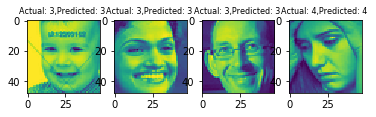

In [43]:
index = 0
cindex = []

for predict, actual in zip(predictions, y_test):
    if predict==actual:
        cindex.append(index)
    index +=1

for ploti , wr in enumerate(cindex[0:4]):
    plt.subplot(1,4,ploti +1)
    plt.imshow(np.reshape(x_test[wr],(48,48)))
    plt.title("Actual: {},Predicted: {} ".format(y_test[wr],predictions[wr]), fontsize=8)
    i +=1

In [7]:
from PIL import Image

In [226]:
im = Image.open('farhan(1).png', 'r')
pix_val = list(im.getdata())
pix_val_flat = [x for sets in pix_val for x in sets]
a = np.array(pix_val_flat)

In [237]:
xx = []
pix_val[0][0]
for i in range(2304):
    xx.append(pix_val[i][2])

In [238]:
xx = np.array(xx)
xx= xx.reshape(1,-1)

In [239]:
c = logreg.predict(xx)

In [240]:
if c[0] ==1:
    c = 'Anger'
if c[0] ==3:
    c = 'Fear'
if c[0] ==4:
    c = 'Happy'
if c[0] ==5:
    c = 'Sad'
if c[0] ==6:
    c = 'Surprise'
if c[0] ==7:
    c = 'Neutral'
if c[0] ==2:
    c = 'Disgust'

In [1]:
plt.imshow(np.reshape(xx,(48,48)))
plt.title("Predicted: {} ".format(c), fontsize=8)


NameError: name 'plt' is not defined